In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cncr=pd.read_csv("haberman.csv")
print(cncr)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
7     34    59      0       2
8     34    66      9       2
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
24    38    69     21       2
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62      3       1
29    38    64      1       1
..   ...   ...    ...     ...
276   67    66      0       1
277   67  

In [9]:
#Q1 no of points and features
print(cncr.shape)

(306, 4)


In [10]:
#Q1 no of classes
cncr.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [11]:
#Q1 no of status
cncr["status"].value_counts()
#No of patient died within 5 year are 81
#and survived are 225

1    225
2     81
Name: status, dtype: int64

In [12]:
#Q2-our objective is to classify the survival status wrt to other 3 independent variables that is year,age,nodes.

In [28]:
cncr=cncr.rename(columns={'year':"operation_year",'nodes':'positive axillary nodes detected'})

cncr

,age,operation_year,positive axillary nodes detected,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


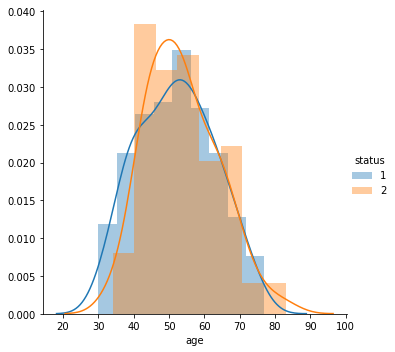

In [7]:
#Pdf of data WRT age

sns.FacetGrid(cncr, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

#as both the graphs are mostly overlapping so it is not possible to distinguish WRT age 
#most of the patient who died are from age grp 40 to 45

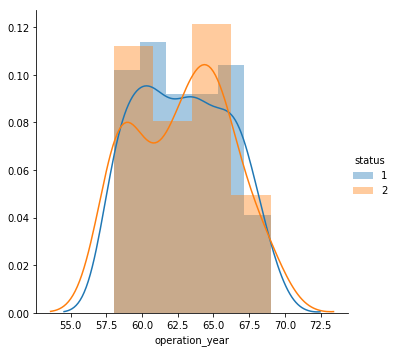

In [13]:
#Pdf of data WRT operation_year

sns.FacetGrid(cncr,hue="status",height=5).map(sns.distplot,"operation_year").add_legend()
plt.show()

#as PDF both the graphs are overlapping so it is not possible to distinguish WRT operation_year 
#most of the patient who died are b/w 1963 to 1966

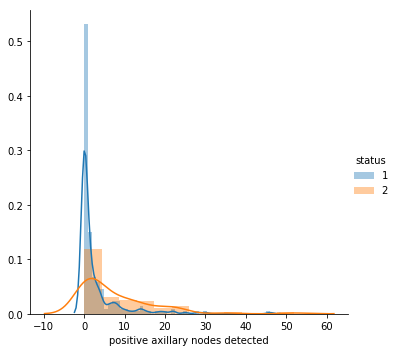

In [16]:
#Pdf of data WRT Positive nodes
sns.FacetGrid(cncr,hue="status",height=5).map(sns.distplot,"positive axillary nodes detected").add_legend()
plt.show()

#from this graph we can interpret that around 55% of the of the people who survived have positive nodes 0 and allmost 
#15% of the people having nodes 1 survived and the graph keep on decreasing means survival rate decereses wrt positive 
#nodes

In [25]:
cncr_lived=cncr.loc[cncr["status"] == 1];
cncr_died=cncr.loc[cncr["status"]== 2 ]

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


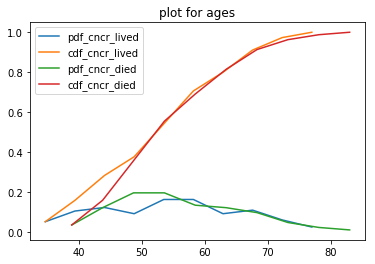

In [28]:
#Cdf of data WRT age
counts, bin_edges=np.histogram(cncr_lived['age'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges=np.histogram(cncr_died['age'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("plot for ages")
plt.legend(["pdf_cncr_lived","cdf_cncr_lived","pdf_cncr_died","cdf_cncr_died"])
plt.show()

#if age is less then 38 years then the person survive and if it is more then 77 year then died

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


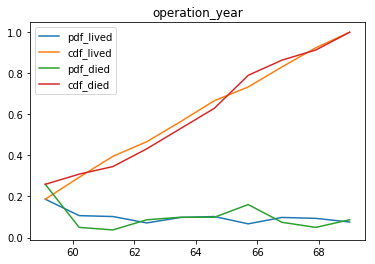

In [29]:
#CDF Of data WRT Operation_year
counts,bin_edges=np.histogram(cncr_lived['operation_year'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(cncr_died['operation_year'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("operation_year")
plt.legend(["pdf_lived","cdf_lived","pdf_died","cdf_died"])

#as both the graph are quite similar so it donts provide us enough information

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


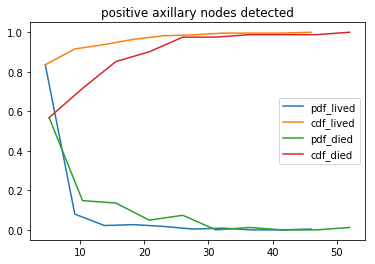

In [30]:
##Cdf of data WRT Positive nodes

counts,bin_edges=np.histogram(cncr_lived['positive axillary nodes detected'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(cncr_died['positive axillary nodes detected'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("positive axillary nodes detected")
plt.legend(["pdf_lived","cdf_lived","pdf_died","cdf_died"])
plt.show()

#if the positive auxillary nodes are greater then 45 then chances of survival is bleak 

In [56]:
print("means_age_lived:")
print(np.mean(cncr_lived['age']))
print("means_age_died:")
print(np.mean(cncr_died['age']))
print("means_operation_year_lived:")
print(np.mean(cncr_lived['operation_year']))
print("means_operation_year_died:")
print(np.mean(cncr_died['operation_year']))
print("means_positive axillary nodes detected_lived:")
print(np.mean(cncr_lived['positive axillary nodes detected']))
print("means_positive axillary nodes detected_died:")
print(np.mean(cncr_died['positive axillary nodes detected']))

print("90th percentile:")
print(np.percentile(cncr_died['positive axillary nodes detected'],25))
print(np.percentile(cncr_lived['positive axillary nodes detected'],90))

means_age_lived:
52.01777777777778
means_age_died:
53.67901234567901
means_operation_year_lived:
62.86222222222222
means_operation_year_died:
62.82716049382716
means_positive axillary nodes detected_lived:
2.7911111111111113
means_positive axillary nodes detected_died:
7.45679012345679
90th percentile:
1.0
8.0


In [36]:
cncr_lived.describe()

,age,operation_year,positive axillary nodes detected,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [37]:
cncr_died.describe()
#about 27% of the patient are not able to survive
#mean age of person who died are greater then those who survive
#mean of positive auxiliary nodes who died is almost 3 times that of who survive
#everyone who is below 35 survived on the otherhand anyone who is above 77 died
#anyone having +ve nodes above 46 died
#if patient have 0 +ve node then probability of survival is more 

,age,operation_year,positive axillary nodes detected,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [29]:
cncr.describe()
#75% of patient has less then 4 lymph nodes
#50% of the patient are of  age grp from 44 to about 61
#50% of patient have operation in year b/w 1960 to 66

,age,operation_year,positive axillary nodes detected,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


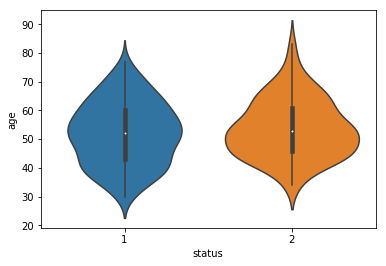

In [38]:
sns.violinplot(x="status", y="age", data=cncr, size=8)
plt.show()
#Both the plot are similar so we cant distinguish on this basis

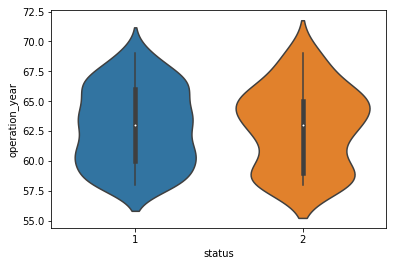

In [39]:
sns.violinplot(x="status", y="operation_year", data=cncr, size=8)
plt.show()
#

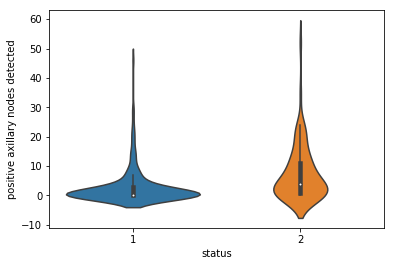

In [40]:
sns.violinplot(x="status", y="positive axillary nodes detected", data=cncr, size=8)
plt.show()
#less the +ve lymph node more is the survival
#Probability of death increases with increase of lymph node

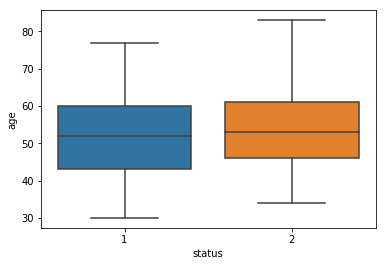

In [41]:
sns.boxplot(x='status',y='age', data=cncr)
plt.show()

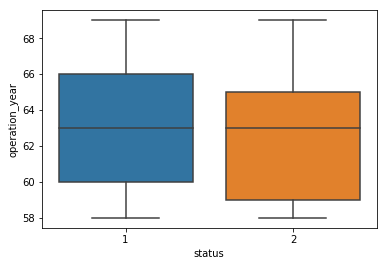

In [42]:
sns.boxplot(x='status',y='operation_year',data=cncr)
plt.show()


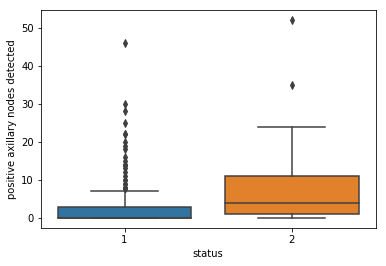

In [43]:
sns.boxplot(x='status',y='positive axillary nodes detected',data=cncr)
plt.show()
#75% of the patient who survives have less then 3 no of lymph nodes

# 2-D Scatter Plot

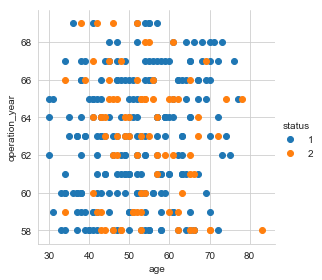

In [58]:
sns.set_style("whitegrid")
sns.FacetGrid(cncr,hue="status",height=4).map(plt.scatter,"age","operation_year").add_legend()
plt.show()
# we cant distinguish anything from this as both plot are coincident

# Pair-plot

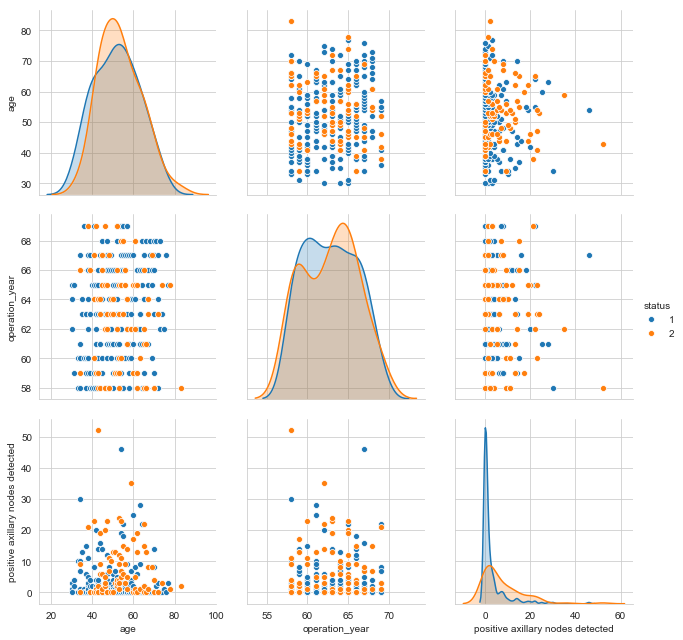

In [62]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
plt.close()
sns.set_style("whitegrid")
sns.pairplot(cncr,hue="status",height=3,vars=["age","operation_year","positive axillary nodes detected"])
plt.show()
#from these whole graphs we can only find something fruitful from the last graph that is +node Vs +ve node which tells 
# most of patient who survived have 0 +ve nodes 
#most of patient who died have 1 +ve node.

# Conclusion

### 1) survival probability is high in case of 0 lymph node.
### 2) 75% of survived population has less then equal to 4 +ve lymph nodes.
### 3) #everyone who is below 35 survived on the otherhand anyone who is above 77 died
### 4) anyone having +ve nodes above 46 died